In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview

CityData = pd.read_csv(city_data_to_load)
RideData = pd.read_csv(ride_data_to_load)

In [2]:
CityData.head()

#RideData.head()

Both = CityData.merge(RideData, how = 'inner', on = 'city')
Both
Both.type.unique()
Both.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
driver = Both.groupby(['city','driver_count'])
#driver.head()

In [4]:
grouped = Both.groupby(['type','city'])
mean = pd.DataFrame(grouped["fare"].mean())
mean

count = pd.DataFrame(grouped["ride_id"].count())
count

RuralMean = mean.loc['Rural']
UrbanMean = mean.loc['Urban']
SuburbanMean = mean.loc['Suburban']

RuralCount = count.loc['Rural']
UrbanCount = count.loc['Urban']
SuburbanCount = count.loc['Suburban']

Both.type.unique()

size = pd.DataFrame(grouped["driver_count"].max())
size.head()

driver_count
type  city                        
Rural Bradshawfurt               7
      Garzaport                  7
      Harringtonfort             4
      Jessicaport                1
      Lake Jamie                 4

## Bubble Plot of Ride Sharing Data

In [6]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


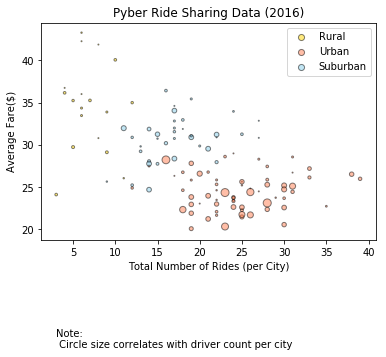

In [30]:
Rural = plt.scatter(RuralCount, RuralMean, marker="o", facecolors="gold", edgecolors="black",
            s=size, alpha=.5, label = "Rural")

Urban = plt.scatter(UrbanCount, UrbanMean, marker="o", facecolors="coral", edgecolors="black",
           s=size, alpha=.5, label = "Urban")

Suburban = plt.scatter(SuburbanCount, SuburbanMean, marker="o", facecolors="skyblue", edgecolors="black",
            s=size, alpha=.5, label = "Suburban")




#Urban = plt.scatter(UrbanCount, UrbanMean, marker="o", facecolors=cm.autumn(75), edgecolors="black",
#           s=size, alpha=.5, label = "Urban")

#Suburban = plt.scatter(SuburbanCount, SuburbanMean, marker="o", facecolors=cm.cool(90), edgecolors="black",
#            s=size, alpha=.5, label = "Suburban")


# Create a legend for our chart
plt.legend(handles=[Rural, Urban, Suburban], loc="best")



plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare($)")

plt.text(3, 6, 'Note: \n Circle size correlates with driver count per city')



plt.show()

## Total Fares by City Type

In [26]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


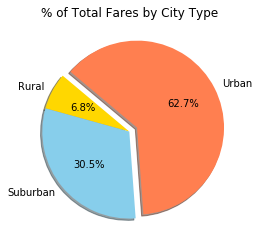

In [34]:
grouped = Both.groupby(['type'])
percent1 = pd.DataFrame(grouped["fare"].sum())
percent1
percent1 = 100*percent1/percent1.sum()

percent1["fare"] = percent1["fare"].map("{: .2f}".format)

lab = ["Rural","Suburban","Urban"]
colors = ["gold","skyblue","coral"]

percent1 = percent1.astype('double')

explode = (0, 0, 0.1)

plt.pie(percent1, labels=lab, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

plt.show()

## Total Rides by City Type

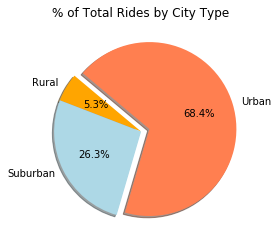

In [28]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure

grouped = Both.groupby(['type'])
percent = pd.DataFrame(grouped["type"].count())
percent = 100*percent/percent.sum()

percent["type"] = percent["type"].map("{: .2f}".format)
percent

lab = ["Rural","Suburban","Urban"]
colors = ["orange","lightblue","coral"]

percent = percent.astype('double')

explode = (0, 0, 0.1)

plt.pie(percent, labels=lab, explode=explode, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

#percent

plt.show()


## Total Drivers by City Type

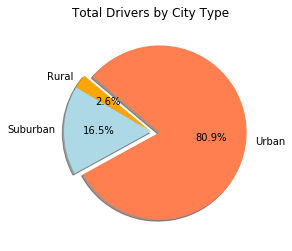

In [29]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure

grouped = Both.groupby(['type','city'])
percent = pd.DataFrame(grouped["driver_count"].min())

percent = percent.groupby(['type'])
percent = pd.DataFrame(percent["driver_count"].sum())

percent = 100*percent/percent.sum()
percent

percent["driver_count"] = percent["driver_count"].map("{: .2f}".format)
percent

lab = ["Rural","Suburban","Urban"]
colors = ["orange","lightblue","coral"]

percent = percent.astype('double')

explode = (0, 0, 0.1)

plt.pie(percent, labels=lab, explode=explode, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Drivers by City Type")


plt.show()

